# Problem Statement
- Air pollution 

In [170]:
import pandas as pd
import numpy as np

import seaborn as sns

from sklearn.impute import SimpleImputer

In [153]:
df = pd.read_csv('AirQualityUCI.csv', sep=";")

In [154]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [155]:
df = df.iloc[:, 2:-2]

In [156]:
df.dropna(inplace=True)

### Replacing -200 with nan and imputing using a SimpleImputer

In [157]:
feature_list = df.columns.tolist()

In [158]:
for feature in feature_list:    
    df[feature] = df[feature].apply(lambda x: str(x).replace(',', '.')) 
    df[feature] = df[feature].apply(lambda x: str(x).replace('-200.0', str(np.nan)))
    df[feature] = df[feature].apply(lambda x: float(x))

In [159]:
df['CO(GT)'] = df['CO(GT)'].apply(lambda x: str(x).replace('-200.0', str(np.nan))) 
df['CO(GT)'] = df['CO(GT)'].apply(lambda x: str(x).replace('-200', str(np.nan)))    

In [160]:
df.dtypes

CO(GT)            object
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
dtype: object

In [161]:
df.head(20) 

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
5,1.2,1197.0,38.0,4.7,750.0,89.0,1337.0,96.0,1393.0,949.0,11.2,59.2,0.7848
6,1.2,1185.0,31.0,3.6,690.0,62.0,1462.0,77.0,1333.0,733.0,11.3,56.8,0.7603
7,1.0,1136.0,31.0,3.3,672.0,62.0,1453.0,76.0,1333.0,730.0,10.7,60.0,0.7702
8,0.9,1094.0,24.0,2.3,609.0,45.0,1579.0,60.0,1276.0,620.0,10.7,59.7,0.7648
9,0.6,1010.0,19.0,1.7,561.0,NaN,1705.0,NaN,1235.0,501.0,10.3,60.2,0.7517


### Impute the nan values

In [162]:
imputer = SimpleImputer(strategy='mean')

In [163]:
df_new = imputer.fit_transform(df)

In [164]:
df_new = pd.DataFrame(df_new)

In [165]:
df_new.columns = feature_list

In [248]:
df_new.head(10)

,CO(GT),NMHC(GT),C6H6(GT),NOx(GT),NO2(GT)
0,2.6,150.0,11.9,166.000000,113.000000
1,2.0,112.0,9.4,103.000000,92.000000
2,2.2,88.0,9.0,131.000000,114.000000
3,2.2,80.0,9.2,172.000000,122.000000
4,1.6,51.0,6.5,131.000000,116.000000
5,1.2,38.0,4.7,89.000000,96.000000
6,1.2,31.0,3.6,62.000000,77.000000
7,1.0,31.0,3.3,62.000000,76.000000
8,0.9,24.0,2.3,45.000000,60.000000
9,0.6,19.0,1.7,246.896735,113.091251


In [247]:
df_new = df_new.iloc[:, [0, 2, 3, 5, 7]]

In [168]:
df_new['CO(GT)'].value_counts()

2.15275     1683
1.00000      305
1.40000      279
1.60000      275
1.50000      273
            ... 
9.50000        1
11.50000       1
11.90000       1
9.20000        1
9.90000        1
Name: CO(GT), Length: 97, dtype: int64

In [249]:
df_new['AQI'] = df_new.sum(axis=1)/len(df_new.columns)

d:\downloads\softwares\anaconda\envs\ml-venv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [250]:
df_new['AQI'] = df_new['AQI'].apply(lambda x: int(x))

d:\downloads\softwares\anaconda\envs\ml-venv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [251]:
df_new.head()

,CO(GT),NMHC(GT),C6H6(GT),NOx(GT),NO2(GT),AQI
0,2.6,150.0,11.9,166.0,113.0,88
1,2.0,112.0,9.4,103.0,92.0,63
2,2.2,88.0,9.0,131.0,114.0,68
3,2.2,80.0,9.2,172.0,122.0,77
4,1.6,51.0,6.5,131.0,116.0,61


In [253]:
df_new.sort_values(by='AQI', ascending=False) 

,CO(GT),NMHC(GT),C6H6(GT),NOx(GT),NO2(GT),AQI
6672,9.90000,218.811816,50.8,1479.0,269.0,405
6264,10.10000,218.811816,45.2,1389.0,255.0,383
6193,11.90000,218.811816,50.6,1389.0,220.0,378
6192,10.20000,218.811816,49.5,1369.0,227.0,374
6169,6.90000,218.811816,37.6,1345.0,245.0,370
...,...,...,...,...,...,...
11,0.70000,8.000000,1.1,16.0,28.0,10
347,0.50000,21.000000,0.6,12.0,20.0,10
778,0.30000,9.000000,0.7,16.0,25.0,10
299,0.30000,19.000000,0.6,13.0,22.0,10


In [256]:
def aqi_bin(x):
    if ((x>=0) & (x<=50)):
        return 'Good'
    elif ((x>=51) & (x<=100)):
        return 'Moderate'
    elif ((x>=101) & (x<=150)):
        return 'Unhealthy for Sensitive groups'
    elif ((x>=151) & (x<=200)):
        return 'Unhealthy'
    elif ((x>=201) & (x<=300)):
        return 'Very Unhealthy'
    else:
        return 'Hazardous'

In [257]:
df_new['AQI Category'] = df_new['AQI'].apply(lambda x: aqi_bin(x))

d:\downloads\softwares\anaconda\envs\ml-venv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [437]:
df_new.head(5)

,CO(GT),NMHC(GT),C6H6(GT),NOx(GT),NO2(GT),AQI,AQI Category
0,2.6,150.0,11.9,166.0,113.0,88,Moderate
1,2.0,112.0,9.4,103.0,92.0,63,Moderate
2,2.2,88.0,9.0,131.0,114.0,68,Moderate
3,2.2,80.0,9.2,172.0,122.0,77,Moderate
4,1.6,51.0,6.5,131.0,116.0,61,Moderate


In [259]:
df_new['AQI Category'].value_counts()

Unhealthy for Sensitive groups    4027
Moderate                          3354
Unhealthy                         1018
Very Unhealthy                     633
Good                               258
Hazardous                           67
Name: AQI Category, dtype: int64

In [480]:
df_imbalance = df_new['AQI Category'].value_counts()

In [481]:
df_imbalance = pd.DataFrame(df_imbalance).reset_index()
df_imbalance.columns = ['Class', 'Instances']
df_imbalance

,Class,Instances
0,Unhealthy for Sensitive groups,4027
1,Moderate,3354
2,Unhealthy,1018
3,Very Unhealthy,633
4,Good,258
5,Hazardous,67


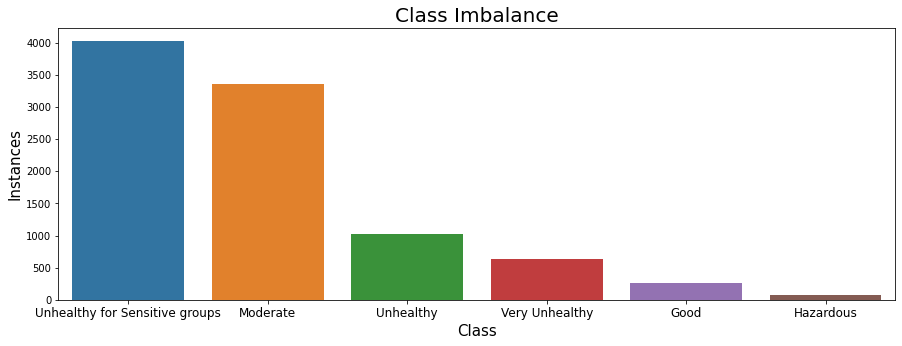

In [491]:
plt.subplots(figsize=(15,5))
sns.barplot(x='Class',y='Instances',data=df_imbalance)
plt.ylabel('Instances', fontsize=15)
plt.xticks(rotation=0,fontsize=12)
plt.xlabel('Class', fontsize=15)
plt.title('Class Imbalance', fontsize=20)
plt.show()

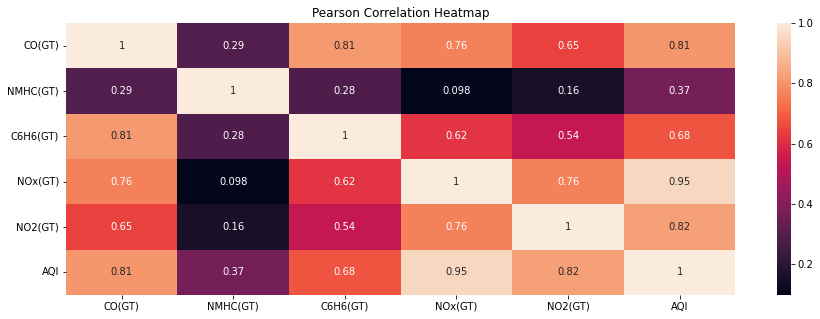

In [493]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (15, 5))
sns.heatmap(df_new.corr(), annot=True)
plt.title('Pearson Correlation Heatmap')
plt.show()

In [348]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.metrics import r2_score, accuracy_score, f1_score, auc, roc_auc_score, classification_report

In [317]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=3)

scaler = StandardScaler()
encoder = LabelEncoder()

In [370]:
X = df_new.iloc[:, : -2]
y = df_new.iloc[:, -1]
# y = encoder.fit_transform(y)

In [371]:
X_scaled = scaler.fit_transform(X)

In [373]:
xtrain, xtest, ytrain, ytest = train_test_split(X_scaled, y, test_size=0.3, random_state=0)

In [365]:
rfc.fit(xtrain, ytrain)

RandomForestClassifier(max_depth=3)

In [366]:
pred = rfc.predict(xtest)

In [358]:
accuracy_score(ytest, pred)

0.9106837606837607

In [367]:
print(classification_report(ytest, pred))

                                precision    recall  f1-score   support

                          Good       1.00      0.77      0.87        69
                     Hazardous       0.00      0.00      0.00        18
                      Moderate       0.97      0.94      0.96       852
                     Unhealthy       0.85      0.74      0.79       241
Unhealthy for Sensitive groups       0.89      0.98      0.93       998
                Very Unhealthy       0.84      0.73      0.78       162

                      accuracy                           0.91      2340
                     macro avg       0.76      0.69      0.72      2340
                  weighted avg       0.91      0.91      0.91      2340



d:\downloads\softwares\anaconda\envs\ml-venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\downloads\softwares\anaconda\envs\ml-venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\downloads\softwares\anaconda\envs\ml-venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

In [422]:
roc_auc_score(ytest, rfc.predict_proba(xtest), multi_class='ovr')

0.9866908194006228

In [369]:
f1_score(ytest, pred, average='weighted')

0.9070292087720445

- Problem Statement (Show images)
- Data collection (Source: https://archive.ics.uci.edu/ml/datasets/Air+quality)
- Feature selection and engineering (https://bazallergy.com/understand-the-basics-of-the-air-quality-index/)
- Data preprocessing/ Imputation
- Normalization
- Over-sampling
- Model selection
- Pipeline
- Hyperparameter tuning
- GridSearchCV
- Model evaluation
- Results
- Conclusion

- SVC: SVM
- Logistic: Linear model
- KNeighborsClassifier: Neighbors
- RandomForest: Ensemble technique
- AdaBoost: Boosting technique

### Oversampling using SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [420]:
y_res.value_counts()

Very Unhealthy                    4027
Good                              4027
Unhealthy for Sensitive groups    4027
Hazardous                         4027
Moderate                          4027
Unhealthy                         4027
Name: AQI Category, dtype: int64

In [421]:
X_res.shape

(24162, 5)

In [435]:
X_scaled = scaler.fit_transform(X_res)

xtrain, xtest, ytrain, ytest = train_test_split(X_scaled, y_res, test_size=0.3, random_state=0)

rfc = RandomForestClassifier(n_estimators=100, max_depth=3, n_jobs=-1, random_state=0)

rfc.fit(xtrain, ytrain)

pred = rfc.predict(xtest)

print('Accuracy: {}'.format(accuracy_score(ytest, pred)))

print('F1-Score: {}'.format(f1_score(ytest, pred, average='weighted')))

print(classification_report(ytest, pred))

# print('AUC score: {}'.format(roc_auc_score(ytest, rfc.predict_proba(xtest), multi_class='ovr')))

Accuracy: 0.8754310939439923
F1-Score: 0.8765042739613984
                                precision    recall  f1-score   support

                          Good       0.99      0.93      0.96      1193
                     Hazardous       0.99      0.87      0.92      1180
                      Moderate       0.89      0.95      0.92      1213
                     Unhealthy       0.77      0.80      0.79      1203
Unhealthy for Sensitive groups       0.87      0.80      0.83      1219
                Very Unhealthy       0.79      0.90      0.84      1241

                      accuracy                           0.88      7249
                     macro avg       0.88      0.88      0.88      7249
                  weighted avg       0.88      0.88      0.88      7249



### Oversampling + Stratified sampling

In [460]:
X_scaled = scaler.fit_transform(X_res)

xtrain, xtest, ytrain, ytest = train_test_split(X_scaled, y_res, test_size=0.3, stratify=y_res, random_state=0)

rfc = RandomForestClassifier(n_estimators=150, max_depth=3, n_jobs=-1, random_state=0)

rfc.fit(xtrain, ytrain)

pred = rfc.predict(xtest)

print('Train Accuracy: {}'.format(accuracy_score(ytrain, rfc.predict(xtrain))))

print('Test Accuracy: {}'.format(accuracy_score(ytest, pred)))

print('F1-Score: {}'.format(f1_score(ytest, pred, average='weighted')))

print(classification_report(ytest, pred))

# print('AUC score: {}'.format(roc_auc_score(ytest, rfc.predict_proba(xtest), multi_class='ovr')))

Train Accuracy: 0.8703955537160764
Test Accuracy: 0.8689474410263485
F1-Score: 0.8696497804582144
                                precision    recall  f1-score   support

                          Good       0.99      0.93      0.96      1208
                     Hazardous       0.97      0.89      0.93      1208
                      Moderate       0.89      0.94      0.91      1208
                     Unhealthy       0.77      0.76      0.77      1208
Unhealthy for Sensitive groups       0.84      0.79      0.81      1209
                Very Unhealthy       0.79      0.90      0.84      1208

                      accuracy                           0.87      7249
                     macro avg       0.87      0.87      0.87      7249
                  weighted avg       0.87      0.87      0.87      7249



Data Preprocessing -> Feature selection and engineering -> Basic RF -> Oversampling -> Model Selection -> Results

In [494]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators=1000, random_state=0, learning_rate=2.2)
clf.fit(xtrain, ytrain)
pred = clf.predict(xtest)

In [495]:
print('Train Accuracy: {}'.format(accuracy_score(ytrain, clf.predict(xtrain))))

print('Test Accuracy: {}'.format(accuracy_score(ytest, pred)))

print('F1-Score: {}'.format(f1_score(ytest, pred, average='weighted')))

print(classification_report(ytest, pred))

Train Accuracy: 0.8688582746999349
Test Accuracy: 0.8656366395364878
F1-Score: 0.8641942453806402
                                precision    recall  f1-score   support

                          Good       1.00      0.74      0.85      1208
                     Hazardous       0.88      0.96      0.92      1208
                      Moderate       0.78      0.96      0.86      1208
                     Unhealthy       0.84      0.84      0.84      1208
Unhealthy for Sensitive groups       0.95      0.96      0.95      1209
                Very Unhealthy       0.80      0.73      0.76      1208

                      accuracy                           0.87      7249
                     macro avg       0.87      0.87      0.86      7249
                  weighted avg       0.87      0.87      0.86      7249



## Team Johari and Amber

### Create pipeline

In [540]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import GridSearchCV

In [555]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, f1_score

In [574]:
lr = LogisticRegression(solver='liblinear', multi_class='auto')
pipe_lr = Pipeline([('scaler', scaler), ('model', lr)])
cv = RepeatedStratifiedKFold(n_splits =10,n_repeats=3,random_state=1)
# scores = cross_val_score(pipe, X,y, scoring= 'accuracy',cv =cv, n_jobs=-1)

rf = RandomForestClassifier()
pipe_rf = Pipeline([('scaler', scaler), ('model', rf)])

svc = SVC(gamma='auto')
pipe_svc = Pipeline([('scaler', scaler), ('model', svc)])

knn = KNeighborsClassifier()
pipe_knn = Pipeline([('scaler', scaler), ('model', knn)])

ada = AdaBoostClassifier()
pipe_ada = Pipeline([('scaler', scaler), ('model', ada)])

In [577]:
model_params = {
    
    'Random Forest': {
        'model': pipe_rf,
        'params': {
            'model__n_estimators': [50, 100, 150,  200],
            'model__max_depth': [3, 5, 8]
        }
    },
    'SVC' : {
        'model': pipe_svc,
        'params': {
            'model__C': [1,10,20],
            'model__kernel': ['rbf', 'linear']
        }
    },
    'Logistic Regression' : {
        'model': pipe_lr,
        'params':{
            'model__C': [1,5,10],
            'model__penalty': ['l1', 'l2']
        }
    },
    'KNN' : {
        'model': pipe_knn,
        'params':{
            'model__leaf_size': range(1,3),
            'model__n_neighbors': range(1,10),
            'model__p' : [1,2]
        }
    },
    'AdaBoost': {
        'model': pipe_ada,
        'params':{
            'model__n_estimators': [100, 200, 500, 1000],
            'model__learning_rate': np.arange(1.0, 2.5, 0.2)
        }
    }
}
        

In [578]:
model_scores = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=cv, return_train_score=False, n_jobs=-1)
    clf.fit(xtrain, ytrain)
    ypred = clf.predict(xtest)
    model_scores.append({
        'Model': model_name,
        'Best parameters': clf.best_params_,
        'Train score': clf.best_score_,
        'Test score': accuracy_score(ytest, ypred)
        
    })
    
print(model_scores)

[{'Model': 'Random Forest', 'Best parameters': {'model__max_depth': 8, 'model__n_estimators': 200}, 'Train score': 0.9844694644945032, 'Test score': 0.9828941923023865}, {'Model': 'SVC', 'Best parameters': {'model__C': 20, 'model__kernel': 'linear'}, 'Train score': 0.9958414710242283, 'Test score': 0.9965512484480618}, {'Model': 'Logistic Regression', 'Best parameters': {'model__C': 10, 'model__penalty': 'l1'}, 'Train score': 0.8298159751784701, 'Test score': 0.8332183749482688}, {'Model': 'KNN', 'Best parameters': {'model__leaf_size': 1, 'model__n_neighbors': 1, 'model__p': 1}, 'Train score': 0.9823801924526033, 'Test score': 0.9811008414953787}, {'Model': 'AdaBoost', 'Best parameters': {'model__learning_rate': 2.1999999999999997, 'model__n_estimators': 1000}, 'Train score': 0.8260112988663386, 'Test score': 0.8761208442543799}]


In [602]:
bm = pd.DataFrame(model_scores)
bm = bm.sort_values(by='Test score', ascending=False)
bm

,Model,Best parameters,Train score,Test score
1,SVC,"{'model__C': 20, 'model__kernel': 'linear'}",0.995841,0.996551
0,Random Forest,"{'model__max_depth': 8, 'model__n_estimators':...",0.984469,0.982894
3,KNN,"{'model__leaf_size': 1, 'model__n_neighbors': ...",0.982380,0.981101
4,AdaBoost,"{'model__learning_rate': 2.1999999999999997, '...",0.826011,0.876121
2,Logistic Regression,"{'model__C': 10, 'model__penalty': 'l1'}",0.829816,0.833218


In [613]:
import plotly.graph_objects as go

colors = ['lightslategray',] * 5
colors[1] = 'crimson'

y = round(bm['Test score'], 4)
x = bm['Model']

# Use textposition='auto' for direct text
fig = go.Figure(data=[go.Bar(
            x=x, y=y,
            text=y,
            textposition='outside', orientation = 'v', marker_color=colors
        )])

# fig.update_layout(
#     autosize=False,
#     width=800,
#     height=500)

fig.update_layout(title_text='Model Comparison',
                 xaxis_title="Model",
                 yaxis_title="Test Score",)


fig.show()

In [614]:
# plt.subplots(figsize=(12,10))
# g = sns.barplot(x='Test score', y='Model', data=bm, palette='inferno', edgecolor=sns.color_palette('dark',10), )
# g.text(bm['Test score'], bm['Model'], round(bm['Test score'],4), color='black', ha="center")
# plt.ylabel('Model', fontsize=15)
# plt.xticks(rotation=45,fontsize=20)
# plt.xlabel('Test Score', fontsize=15)
# plt.title('Best Model', fontsize=24)
# plt.savefig('best_model.png')
# plt.show()

In [547]:
lr = LogisticRegression(solver='liblinear', multi_class='auto', C=10, penalty='l1')
rf = RandomForestClassifier(n_estimators=200, max_depth=8)
svc = SVC(gamma='auto', C=20, kernel='linear')
knn = KNeighborsClassifier(n_neighbors=1, leaf_size=1, p=1)

In [548]:
#Logistic Regression
scores = cross_val_score(lr, xtest, ytest, scoring= 'accuracy', cv =cv, n_jobs=-1)
np.mean(scores)

0.8309193497174067

In [549]:
#Random Forest
scores = cross_val_score(rf, xtest, ytest, scoring= 'accuracy', cv =cv, n_jobs=-1)
np.mean(scores)

0.9799970788086619

In [550]:
#SVC
scores = cross_val_score(svc, xtest, ytest, scoring= 'accuracy', cv =cv, n_jobs=-1)
np.mean(scores)

0.9907571600939862

In [551]:
#KNN
scores = cross_val_score(knn, xtest, ytest, scoring= 'accuracy', cv =cv, n_jobs=-1)
np.mean(scores)

0.9727316949260177

### Final model evaluation

In [617]:
rf = RandomForestClassifier(n_estimators=200, max_depth=8)

In [618]:
rf.fit(xtrain, ytrain)

RandomForestClassifier(max_depth=8, n_estimators=200)

In [619]:
ypred = rf.predict(xtest)

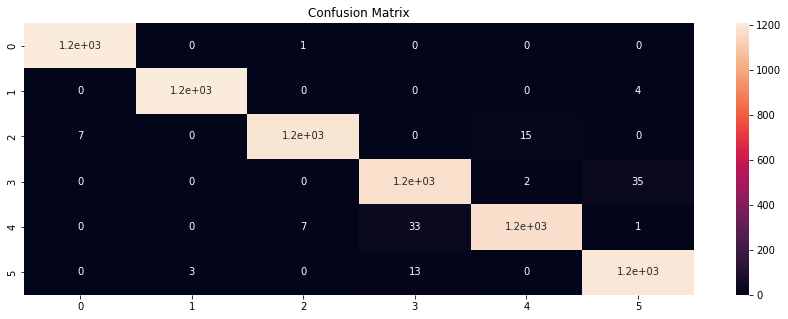

In [620]:
cm = confusion_matrix(ytest, ypred)

fig = plt.figure(figsize = (15, 5))
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt
plt.show()

In [561]:
print(classification_report(ytest, ypred))

                                precision    recall  f1-score   support

                          Good       0.99      1.00      1.00      1208
                     Hazardous       1.00      1.00      1.00      1208
                      Moderate       0.99      0.98      0.99      1208
                     Unhealthy       0.96      0.98      0.97      1208
Unhealthy for Sensitive groups       0.98      0.97      0.98      1209
                Very Unhealthy       0.98      0.99      0.98      1208

                      accuracy                           0.98      7249
                     macro avg       0.98      0.98      0.98      7249
                  weighted avg       0.98      0.98      0.98      7249



In [622]:
print(accuracy_score(ytest, ypred))

0.9833080424886191


In [621]:
print(f1_score(ytest, ypred, average='weighted'))

0.9833162831265209
